# **THE SPARKS FOUNDATION - INTERNSHIP**

Graduate Rotational Internship Program

> ### **Data Science & Business Analytics**

This Notebook deals with the prediction of Student Score dataset using Supervised ML.

## **Task -2**


> ## **Predict Student Score Data Using Supervised ML** 
***
> ## Objective
* Predict the percentage of an student based on the no. of study hours.
* What will be the predicted score if the student studies for 9.25hrs/day ? 
***
> ## About The Data
* This is a simple linear regression task as it involves just 2 variables.
* Data source: [Link](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)
* Data Format: .csv

### **Intern - Swati Gulati**

### Supervised Learning

* In this, the machine learning algorithm learns from **labelled data.**
* **Labeled data** is a group of **samples that have been tagged with one or more labels.** Labeling typically takes a set of unlabeled data and augments each piece of it with informative tags. Labels can be obtained by asking humans to make judgments about a given piece of unlabeled data.

> There are two types of Supervised Learning:
1. **Classification -** It is about predicting a **class or discrete values.** Eg. Male or Female; True or False. Classes are sometimes called as target/labels or categories. This is a binary classification since there are only two class.
**Alogorithms -** *Decision Tree Classification, Random Forest Classification, K-nearest Neighbor*
2. **Regression -** It is about predicting **a quantity or continuous values.** Eg. Age; Salary; Price. *The ultimate goal of the regression algorithm is to plot a best-fit line or curve between the data.*
**Alogorithms -** *Logistic Regression, Polynomial Regression, Support Vector Machine (SVM)*

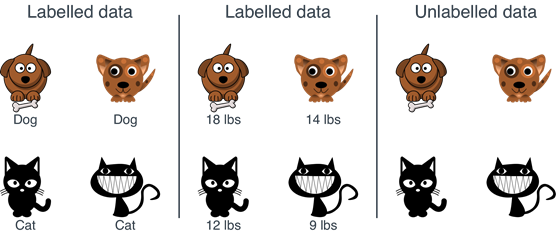

**Simple Linear Regression (SLR)**

* Simple linear regression is a regression model that estimates the **relationship between one independent variable and one dependent variable using a straight line. Both variables should be quantitative.**
*```
 Y = A X + B
``` 
Where, B	=	y-intercept;
A = cofficient (slope); 
Y	=	y- coordinate (Dependent Variable);
X	=	x-coordinate (Independent Variable)


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split      # Split the data into train & test
from sklearn.linear_model import LinearRegression         # SLR Model
from sklearn import metrics                               # Metrics

1. Data Collection & Processing

In [ ]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

# View all rows
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# View rows and columns
data.shape

(25, 2)

In [ ]:
# Getting some basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Getting statistical measures of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data does not contain any missing values.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

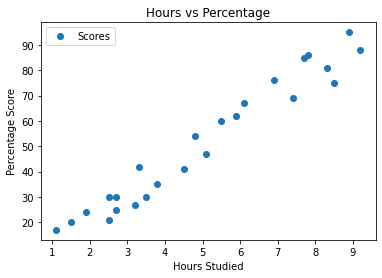

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear (both are increasing) relation between the number of hours studied and percentage of score.**

2. Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
# .iloc[] - Purely integer-location based indexing for selection by position. It is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes (input) and labels (output), the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

3. Split the data into train & test

> **X-axis - In Hours**
* **X_train** - Training data (In Hours) -> 25 * 80% = 20
* **X_test** - Testing data (In Hours) -> 25 * 20% = 5

> **Y-axis - Scores**
* **y_train**- Training data (Scores) -> 25 * 80% = 20
* **y_test** - Testing data (Scores) -> 25 * 20% = 5

In [ ]:
# random_state- which can set it to any random value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)          #test = 20% & train = 80%

4. SLR (Simple Linear Regression)

* The dependent features are called the **dependent variables, outputs, or responses.**
* The independent features are called the **independent variables, inputs, or predictors.**

* Regression is also useful when you want to **forecast a response using a new set of predictors.**

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)             # train data (Inputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

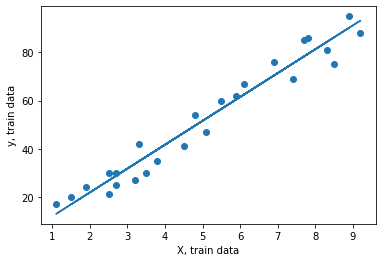

In [ ]:
# Plotting the regression line
# The coef_ contain the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately. .coef_ is an array.
# .intercept_ - It is a scalar. The attributes of model are .intercept_

# Y = a X + b
Y = regressor.coef_ * X + regressor.intercept_       #X is Independent Variable, a = cofficient , b = intercept & Y = Dependent Variable

# Plotting for the test data
# .fit() - fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a .predict() method call.
plt.scatter(X, y)
plt.xlabel("X, train data")
plt.ylabel("y, train data")
plt.plot(X, Y);
plt.show()

5. Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test)                           # Testing data - In Hours
y_pred = regressor.predict(X_test)      # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})        #y_test = testing data (Scores) [Actual]  &   y_pred = (Scores) [predicted] 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
own_pred = regressor.predict([[9.25]])        #[[9.25]] is hours
print("No of Hours = {}".format)
print("Predicted Score = {}".format(own_pred[0]))

<built-in method format of str object at 0x7fe6da383e90>
Predicted Score = 93.69173248737539


6. Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

**Mean Absolute Error (MAE) -** In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.

In [ ]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
